In [1]:
import m94
import pandas as pd
import numpy as np

# read table, assign variables

In [2]:
table5 = pd.read_csv('../data/table5_Donelson.csv')

h    = table5['Depth (m)']     # meters,  water depth
wvht = table5['H (cm)']/100    # meters,  significant waveheight
dpd  = table5['T (s)']         # seconds, dominant wave period
wvdr = table5['Occa (deg)']    # degrees, wave direction
cspd = table5['U (cm/s)']/100  # m/sec, current speed 1mab
cdir = 0                       # degrees, current direction
zr   = 1.00                    # meters, current reference height
rgh = table5['Ds (um)']+table5['k_biol (um)']+table5['k_ripple (um)']            # microns, seafloor rougness

# apply m94 to dataset

In [45]:
d = []
for i in range(len(table5)):
    tauw, tauc, taucw, fwc, zoa, ubr, ks, ubr, ustrc, ustrw, ustrcw = m94.calc_m94(h[i],wvht[i],dpd[i],wvdr[i],cspd[i],cdir,rgh[i],zr)
    d.append(
        {
            'tauw': tauw,
            'tauc': tauc,
            'taucw': taucw,
            'fwc': fwc,
            'zoa': zoa,
            'ubr': ubr,
            'ks': ks,
            'ubr': ubr, 
            'ustrc': ustrc, 
            'ustrw': ustrw, 
            'ustrcw': ustrcw 
        }
    )

d=pd.DataFrame(d)

# plot computed values to published values

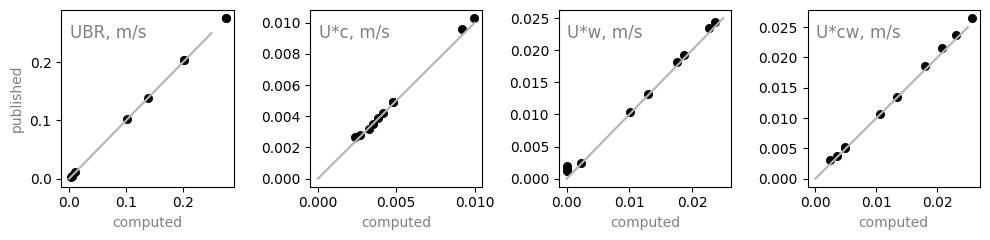

In [46]:
import matplotlib.pyplot as plt
markersize_donelson=30
markersize_tool=20

fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4)
ax1.scatter(d['ubr'],table5['Ub (cm/s)']/100,s=markersize_donelson,c='k')
ax2.scatter(d['ustrc'],table5['u.c (cm/s)']/100,s=markersize_donelson,c='k')
ax3.scatter(d['ustrw'],table5['U.w (cm/s)']/100,s=markersize_donelson,c='k')
ax4.scatter(d['ustrcw'],table5['U.cw (cm/s)']/100,s=markersize_donelson,c='k')

ax1.plot([0,0.25],[0,0.25],c='0.7')
ax2.plot([0,0.01],[0,0.01],c='0.7')
ax3.plot([0,0.025],[0,0.025],c='0.7')
ax4.plot([0,0.025],[0,0.025],c='0.7')

ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax3.set_axisbelow(True)
ax4.set_axisbelow(True)

ax1.text(.05, .84, 'UBR, m/s', transform=ax1.transAxes, fontsize='large',c='0.5')
ax2.text(.05, .84, 'U*c, m/s', transform=ax2.transAxes, fontsize='large',c='0.5')
ax3.text(.05, .84, 'U*w, m/s', transform=ax3.transAxes, fontsize='large',c='0.5')
ax4.text(.05, .84, 'U*cw, m/s', transform=ax4.transAxes, fontsize='large',c='0.5')

ax1.set_xlabel('computed',c='0.5')
ax2.set_xlabel('computed',c='0.5')
ax3.set_xlabel('computed',c='0.5')
ax4.set_xlabel('computed',c='0.5')
ax1.set_ylabel('published',c='0.5')

fig.set_size_inches(10,2.5)
plt.tight_layout()